In [49]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.cm as cm
import numpy as np

In [6]:
data = pd.read_csv("./composlang-beh_no-dupes_agg-by-item.csv")
data

,Unnamed: 0,item,item_index,count,responses,rt,age,trial_type,rating
0,16273,African aftermath,16273,9,[-2 -2 3 1 2 0 1 1 2],2538.555556,29.000000,crit,0.666667
1,14988,African bill,14988,7,[ 2 3 -1 -3 -2 -3 2],5472.285714,34.857143,crit,-0.285714
2,4192,African can,4192,10,[ 2 -3 -1 3 1 1 -2 2 0 3],3837.100000,30.300000,crit,0.600000
3,17362,African catalog,17362,8,[ 3 3 -1 -1 3 -3 -1 -3],3491.375000,32.375000,crit,0.000000
4,4587,African chance,4587,13,[-2 -3 3 -1 -2 -3 -3 -1 -2 -3 -2 1 0],4000.000000,33.615385,crit,-1.384615
...,...,...,...,...,...,...,...,...,...
20022,14860,young socket,14860,9,[-3 -3 -3 3 -3 0 -3 2 -2],3758.555556,26.000000,crit,-1.333333
20023,5367,young spacecraft,5367,12,[ 2 -3 -2 -1 0 -3 3 3 0 2 0 1],4771.583333,26.583333,crit,0.166667
20024,3659,young taxi,3659,12,[-3 -3 2 -1 3 -2 -1 -3 -3 -2 -3 -1],3828.083333,33.583333,crit,-1.416667
20025,19318,young timing,19318,6,[-3 -3 -3 1 -3 -1],4028.166667,35.000000,crit,-2.000000


In [8]:
vecchi = pd.read_csv("../../vecchi2016_an_data_cogsci/vecchi-scores.csv")
vecchi

,item,score,total_occ,preferred_occ
0,terrorist room,0.333333,9,3
1,corporate repayment,1.000000,11,11
2,adjacent flash,0.500000,12,6
3,parliamentary harvest,0.200000,10,2
4,eligible co-ordinator,0.700000,10,7
...,...,...,...,...
27515,combined pulse,0.444444,9,4
27516,Chinese eligibility,0.777778,9,7
27517,linear harbour,0.625000,8,5
27518,slight socialism,1.000000,6,6


In [54]:
joint = vecchi.merge(data[data["trial_type"] == "crit"], on="item", how="inner")
joint

,item,score,total_occ,preferred_occ,Unnamed: 0,item_index,count,responses,rt,age,trial_type,rating
0,adjacent flash,0.500000,12,6,18711,18711,6,[ 0 -3 3 2 -3 -2],3855.500000,30.600000,crit,-0.500000
1,parliamentary harvest,0.200000,10,2,4519,4519,14,[ 0 -3 -1 -2 -2 -3 -3 -2 -3 -2 -3 -3 0 -2],4250.928571,36.214286,crit,-2.071429
2,eligible co-ordinator,0.700000,10,7,15467,15467,10,[3 3 0 1 3 1 3 1 1 1],7904.800000,31.500000,crit,1.700000
3,international prince,0.600000,10,6,7030,7030,11,[ 3 -3 3 0 -3 0 -3 0 1 2 3],4220.454545,30.000000,crit,0.272727
4,scientific deposit,0.454545,11,5,2614,2614,8,[-1 1 -3 0 1 0 1 1],4522.875000,29.500000,crit,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
19992,tall neglect,0.125000,8,1,11584,11584,10,[-3 -3 -1 -2 -3 -3 -2 -2 -3 -3],2913.800000,29.600000,crit,-2.500000
19993,combined pulse,0.444444,9,4,13127,13127,8,[ 2 0 3 1 -1 -1 -3 -2],13765.750000,32.250000,crit,-0.125000
19994,Chinese eligibility,0.777778,9,7,19976,19976,2,[1 3],3502.000000,35.500000,crit,2.000000
19995,linear harbour,0.625000,8,5,17227,17227,7,[ 0 -1 -2 -3 -2 -2 -3],3930.571429,38.857143,crit,-1.857143


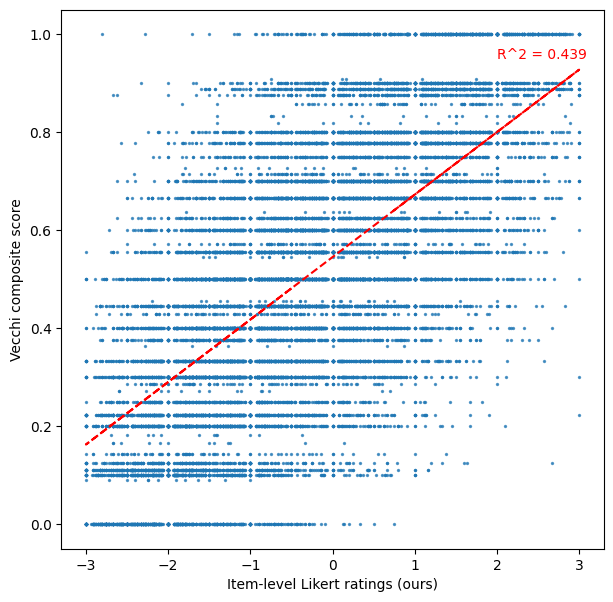

In [108]:
f, a = plt.subplots(1, 1, figsize=(7, 7))
a.scatter(
    joint["rating"] + np.random.rand(len(joint)) * 0.0,
    joint["score"] + np.random.rand(len(joint)) * 0.0,
    s=2,
    alpha=0.7,
)

a.set(ylabel="Vecchi composite score", xlabel="Item-level Likert ratings (ours)")

# plot line of best fit and R^2 value
fit = np.polyfit(joint["rating"], joint["score"], 1)
fit_fn = np.poly1d(fit)
a.plot(joint["rating"], fit_fn(joint["rating"]), "--r")
a.text(
    2, 0.95, f"R^2 = {np.corrcoef(joint['rating'], joint['score'])[0,1]**2:.3f}", c="r"
)

plt.show()

## Now we'll do the same procedure, but pretend ANN data is our collected data

In [103]:
ann_data = pd.read_csv(
    # "/home/aalok/code/surprisal/notebooks/vecchi2016_an_surprisals_gpt2-xl_AB87A9.csv"
    "/home/aalok/code/surprisal/notebooks/vecchi2016_n_surprisals_EleutherAI-gpt-neo-1.3B_AB87A9.csv"
)
ann_data.rename(columns={"an": "item"}, inplace=True)
ann_data

,Unnamed: 0,item,prefix,suffix,EleutherAI-gpt-neo-1.3B
0,0,African aftermath,How likely is this:,NaN,16.530378
1,1,African bill,How likely is this:,NaN,13.782212
2,2,African buffer,How likely is this:,NaN,16.575420
3,3,African can,How likely is this:,NaN,10.067035
4,4,African catalog,How likely is this:,NaN,13.283863
...,...,...,...,...,...
27515,27515,young surname,How likely is this:,NaN,13.349924
27516,27516,young taxi,How likely is this:,NaN,10.064655
27517,27517,young timing,How likely is this:,NaN,15.668028
27518,27518,young tobacco,How likely is this:,NaN,10.777449


In [104]:
joint_ann = joint.merge(ann_data, on="item", how="inner")
joint_ann

,item,score,total_occ,preferred_occ,Unnamed: 0_x,item_index,count,responses,rt,age,trial_type,rating,Unnamed: 0_y,prefix,suffix,EleutherAI-gpt-neo-1.3B
0,adjacent flash,0.500000,12,6,18711,18711,6,[ 0 -3 3 2 -3 -2],3855.500000,30.600000,crit,-0.500000,2300,How likely is this:,NaN,12.228176
1,parliamentary harvest,0.200000,10,2,4519,4519,14,[ 0 -3 -1 -2 -2 -3 -3 -2 -3 -2 -3 -3 0 -2],4250.928571,36.214286,crit,-2.071429,18055,How likely is this:,NaN,12.617941
2,eligible co-ordinator,0.700000,10,7,15467,15467,10,[3 3 0 1 3 1 3 1 1 1],7904.800000,31.500000,crit,1.700000,8556,How likely is this:,NaN,16.001755
3,international prince,0.600000,10,6,7030,7030,11,[ 3 -3 3 0 -3 0 -3 0 1 2 3],4220.454545,30.000000,crit,0.272727,13795,How likely is this:,NaN,12.150613
4,scientific deposit,0.454545,11,5,2614,2614,8,[-1 1 -3 0 1 0 1 1],4522.875000,29.500000,crit,0.000000,21697,How likely is this:,NaN,14.771135
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19992,tall neglect,0.125000,8,1,11584,11584,10,[-3 -3 -1 -2 -3 -3 -2 -2 -3 -3],2913.800000,29.600000,crit,-2.500000,24534,How likely is this:,NaN,17.144091
19993,combined pulse,0.444444,9,4,13127,13127,8,[ 2 0 3 1 -1 -1 -3 -2],13765.750000,32.250000,crit,-0.125000,5328,How likely is this:,NaN,10.213539
19994,Chinese eligibility,0.777778,9,7,19976,19976,2,[1 3],3502.000000,35.500000,crit,2.000000,282,How likely is this:,NaN,14.771700
19995,linear harbour,0.625000,8,5,17227,17227,7,[ 0 -1 -2 -3 -2 -2 -3],3930.571429,38.857143,crit,-1.857143,14557,How likely is this:,NaN,13.351563


In [109]:
def compare_ratings(df, col1="rating", col2="score", xlabel=None, ylabel=None):
    f, a = plt.subplots(1, 1, figsize=(7, 7))
    a.scatter(
        df[col1] + np.random.rand(len(df)) * 0.0,
        df[col2] + np.random.rand(len(df)) * 0.0,
        s=2,
        alpha=0.7,
    )

    # a.set(ylabel="Vecchi composite score", xlabel="Item-level Likert ratings (ours)")
    a.set(xlabel=xlabel, ylabel=ylabel)

    # plot line of best fit and R^2 value
    fit = np.polyfit(df[col1], df[col2], 1)
    fit_fn = np.poly1d(fit)
    a.plot(
        df[col1],
        fit_fn(df[col1]),
        "--r",
        label=f"R^2 = {np.corrcoef(df[col1], df[col2])[0,1]**2:.3f}",
    )
    # a.text(
    #     2,
    #     0.95,
    #     f"R^2 = {np.corrcoef(df[col1], df[col2])[0,1]:.3f}",
    #     c="r",
    # )
    plt.legend()

    return f, a

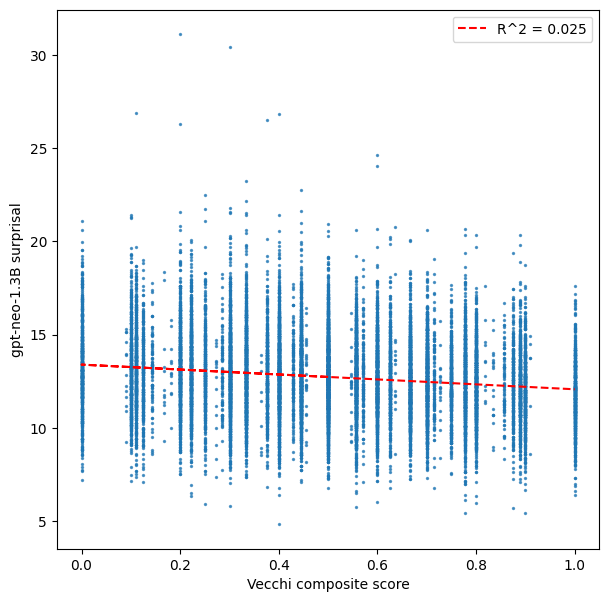

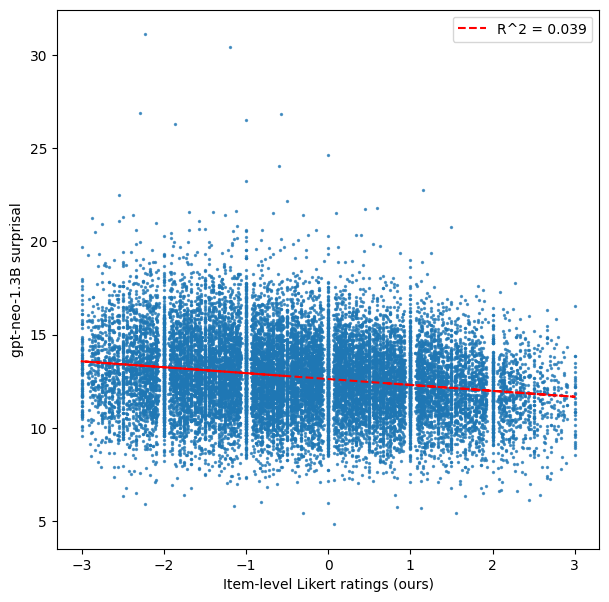

In [110]:
compare_ratings(
    joint_ann,
    col1="score",
    # col2="gpt2-xl",
    col2="EleutherAI-gpt-neo-1.3B",
    xlabel="Vecchi composite score",
    # ylabel="GPT-2 XL surprisal",
    ylabel="gpt-neo-1.3B surprisal",
)
compare_ratings(
    joint_ann,
    col1="rating",
    # col2="gpt2-xl",
    col2="EleutherAI-gpt-neo-1.3B",
    xlabel="Item-level Likert ratings (ours)",
    # ylabel="GPT-2 XL surprisal",
    ylabel="gpt-neo-1.3B surprisal",
)
plt.show()